In [1]:
import matplotlib.pyplot as plt
import numpy as np

In [2]:
def x_out(E, l):
    return (-1-np.sqrt(1+E*l*(l+1)))/E
def x_in(E, l):
    return (-1+np.sqrt(1+E*l*(l+1)))/E

In [146]:
def s(E, l, x):
    V = l*(l+1)/(x**2) - 2/x
    return E - V

def p(x):
    return 2/x

def dp(x):
    return -2/(x**2)
def k(E, l, x):
    return s(E, l, x) + 2/(x*x)/5

In [141]:
def eq_rec(eps, l, delta, x, psi, i):
    temp1 = 2*(1-5*(delta**2)*k(eps, l, x[i-1])/12)*psi[i-1]
    temp2 = (1 + (delta**2/12)*k(eps, l, x[i-2]))*psi[i-2]
    temp3 = 1 + (delta**2/12)*k(eps, l, x[i])
    return (temp1 - temp2)/temp3

In [7]:
def df(psi, x):
    delta = abs(x[0]-x[1])
    d_psi = abs(psi[len(psi)-1] - psi[len(psi)-2])/(delta)
    return d_psi

In [21]:
def plot_ticks():
    plt.figure(figsize = (5,3))
    plt.minorticks_on()
    plt.tick_params(axis='x', which='both', top = True, right = True, direction = 'in', length=5, width=1)
    plt.tick_params(axis='y', which='both', top = True, right = True, direction = 'in', length=5, width=1)

In [150]:
def fpsi_l(a, E, l):
    x_0 = a #posição inicial
    #x_match = x_out(E, l)#ponto de encontro com a solução pela direita
    x_match = 1
    x = np.linspace(x_0, x_match, 100000)
    delta = abs(x[1] - x[0])
    
    psi_l = np.zeros(len(x))
    psi_l[0] = 0
    psi_l[1] = delta

    for i in range(2, len(x)):
        psi_l[i] = eq_rec(E, l, delta, x, psi_l, i)
        
    return psi_l, x

def fpsi_r(b, E, l):
    x_0 = b #posição inicial
    #x_match = x_out(E, l) #ponto de encontro com a solução pela direita
    x_match = 1
    x = np.linspace(x_0, x_match, 100000)
    delta = abs(x[1] - x[0])
    
    psi_r = np.zeros(len(x))
    psi_r[0] = 0
    psi_r[1] = delta

    for i in range(2, len(x)):
        psi_r[i] = eq_rec(E, l, delta, x, psi_r, i)

    return psi_r, x

In [151]:
eps = -2
l = 0
a = 0.001
b = 60
autovalor = []
while eps<-0.01:
    dpsi_l = 0
    dpsi_r = 1
    while abs((dpsi_l-dpsi_r)/(dpsi_r+dpsi_l)/2)>1e-4 and eps<0:
        psi_r, x_r= fpsi_r(b, eps, l)
        psi_l, x_l = fpsi_l(a, eps, l)
        psi_l = psi_l*psi_r[len(psi_r)-1]/psi_l[len(psi_l)-1]

        dpsi_r = df(psi_r, x_r)
        dpsi_l = df(psi_l, x_l)
        
        eps_old = eps
        eps += 0.005*abs((dpsi_l-dpsi_r)/(dpsi_r+dpsi_l)/2)
        
        if abs(eps_old-eps)<1e-8:
            eps+=0.05
    if abs(len(autovalor)) == 0:
            autovalor.append(eps)
        
    if abs(autovalor[len(autovalor)-1]-eps) >1e-2:
        autovalor.append(eps)
        
print(autovalor)

[-0.5427374685621297, -0.49267862947472635, -0.3186403178411361, -0.2686230870485273, -0.18030245364930847, -0.1302919153416664, -0.07820422579460863, -0.01927029059287287, 0.039995845327641645]


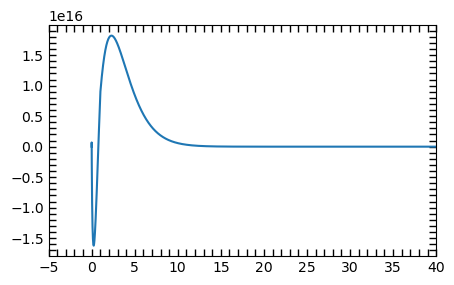

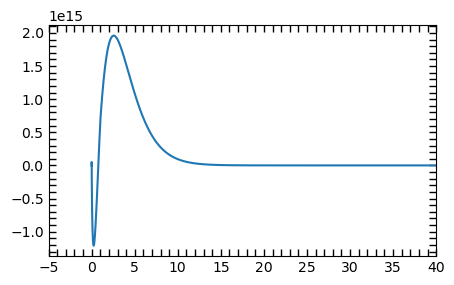

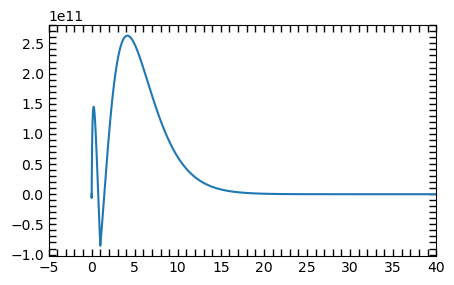

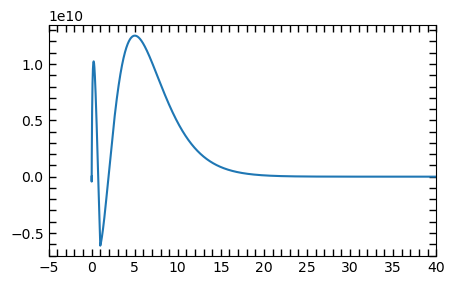

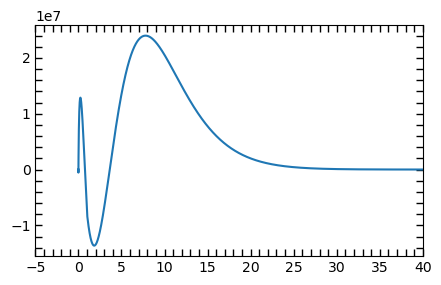

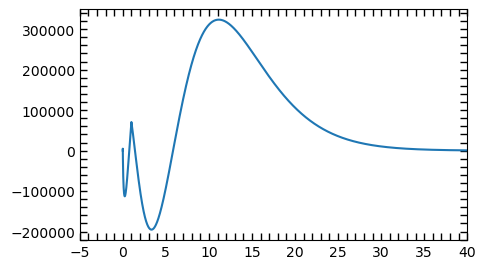

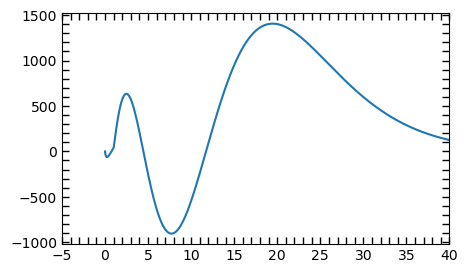

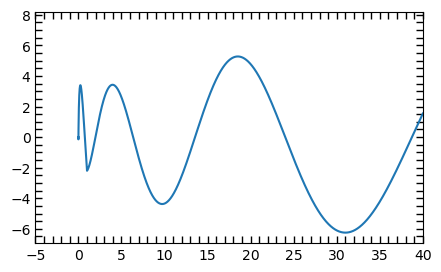

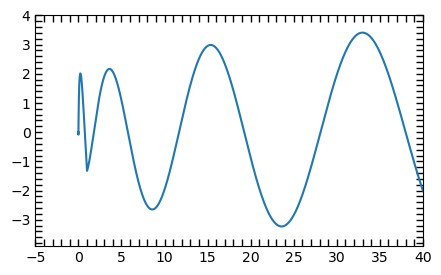

In [155]:
#autovalue = [ -1, -0.5, -0.25, -0.125, -0.111, -0.0625, -0.055]
#autovalue = [ -13.6, -3.4, -1.511, -0.85, -0.544 -0.378, -0.278]
autovalue = autovalor
psi = np.zeros(2*100000) #so°lução geral
x = np.zeros(2*100000)
N = len(autovalue)
l = 0
a = 1e-8
b = 60
for i in range(N):
    plot_ticks()
    psi_r, x_r = fpsi_r(b, autovalue[i], l)
    psi_l, x_l = fpsi_l(a, autovalue[i], l)
    psi_l = psi_l*psi_r[len(psi_r)-1]/psi_l[len(psi_l)-1]
    
    for j in range(len(psi_l)):
        psi[j] = psi_l[j]
        x[j] = x_l[j]
    for j in range(len(psi_r)):
        psi[len(psi_r)+j] = psi_r[len(psi_r) - 1 - j]
        x[len(psi_r)+j] = x_r[len(psi_r) - 1 - j]
    plt.plot(x, psi)
    plt.xlim(-5, 40)